In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Found GPU at: /device:GPU:0
Num GPUs Available:  1


In [ ]:
import tensorflow as tf
from tensorflow import keras
cifar = keras.datasets.cifar10
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [ ]:
(xtrain, ytrain), (xtest, ytest) = cifar.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
def get_data():
    x_train = xtrain.astype("float32") / 255
    X_test = xtest.astype("float32") / 255
    X_valid, X_train = x_train[:10000], x_train[10000:]
    y_valid, y_train = ytrain[:10000], ytrain[10000:]

    y_train, y_valid, y_test = to_categorical(y_train), to_categorical(y_valid), to_categorical(ytest)
    return X_train, y_train, X_valid, y_valid, X_test, y_test

In [ ]:
import matplotlib.pyplot as plt

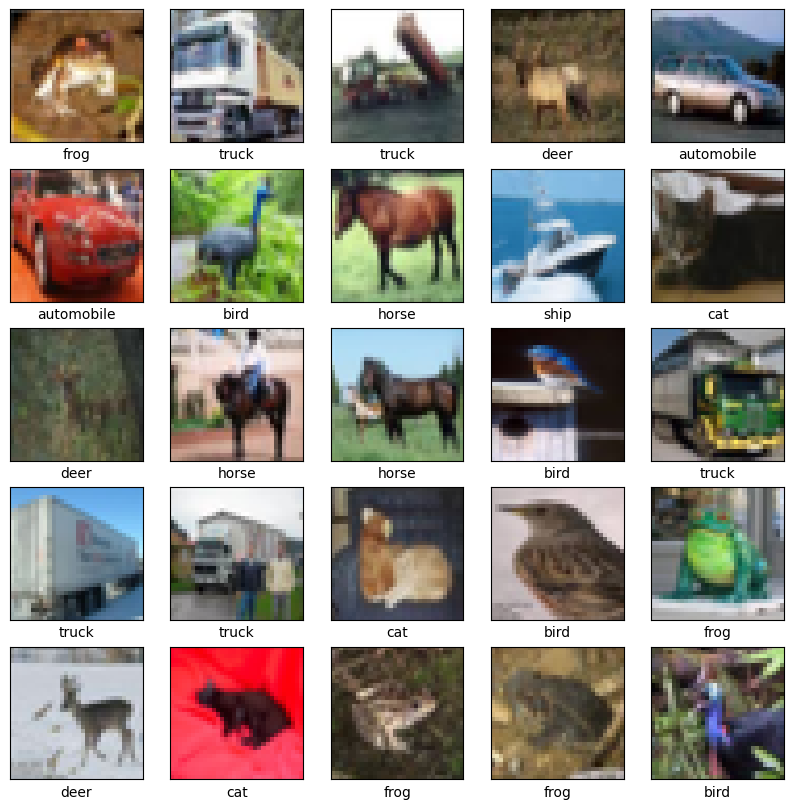

In [ ]:
def show_img(img):
    plt.imshow(img)
    plt.axis("off")

def show_img_grid(img):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img[i])
        #plt.axis("off")
        plt.xlabel(class_names[ytrain[i][0]])
    plt.show()
def plot_summary_train(histories):
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 1, 1)
    plt.title('Loss')
    plt.plot(histories.history['loss'], color='green', label='train')
    plt.plot(histories.history['val_loss'], color='blue', label='test')
    plt.legend(loc='lower right')

    plt.subplot(2, 1, 2)
    plt.title('Accuracy')
    plt.plot(histories.history['accuracy'], color='green', label='train')
    plt.plot(histories.history['val_accuracy'], color='blue', label='test')
    plt.legend(loc='lower right')
    plt.show()
show_img_grid(xtrain)

In [ ]:
X_train, y_train, X_valid, y_valid, X_test, y_test = get_data()

In [ ]:
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_valid.shape, y_valid.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 10)
Test: X=(10000, 32, 32, 3), y=(10000, 10)
Test: X=(10000, 32, 32, 3), y=(10000, 10)


In [ ]:
def run_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = run_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [ ]:
histories = model.fit(X_train, y_train, epochs=15, batch_size=32,
          validation_data=(X_valid, y_valid))
loss, accuracy = model.evaluate(X_test, y_test,verbose=0)

Epoch 1/15
1250/1250 [==============================] - 8s 6ms/step - loss: 0.3100 - accuracy: 0.9033 - val_loss: 0.8195 - val_accuracy: 0.8014
Epoch 2/15
1250/1250 [==============================] - 10s 8ms/step - loss: 0.3108 - accuracy: 0.9039 - val_loss: 0.8096 - val_accuracy: 0.8054
Epoch 3/15
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3188 - accuracy: 0.8984 - val_loss: 0.9173 - val_accuracy: 0.7948
Epoch 4/15
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3056 - accuracy: 0.9032 - val_loss: 0.8160 - val_accuracy: 0.7996
Epoch 5/15
1250/1250 [==============================] - 8s 7ms/step - loss: 0.3113 - accuracy: 0.9032 - val_loss: 0.8595 - val_accuracy: 0.7966
Epoch 6/15
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3089 - accuracy: 0.9045 - val_loss: 0.8587 - val_accuracy: 0.7975
Epoch 7/15
1250/1250 [==============================] - 8s 7ms/step - loss: 0.3096 - accuracy: 0.9018 - val_loss: 0.8673 - val_accuracy

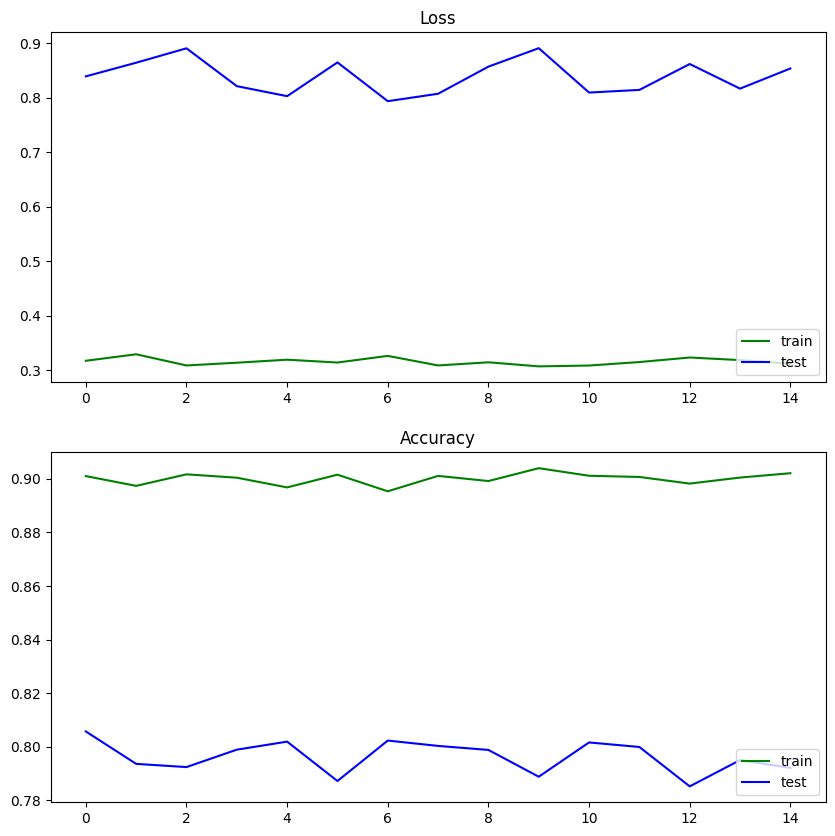

In [ ]:
plot_summary_train(histories)

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam

In [ ]:
def run_trans_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    base_model.trainable = False

    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(lr=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
X_train, y_train, X_valid, y_valid, X_test, y_test = get_data()

Epoch 1/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3097 - accuracy: 0.9033 - val_loss: 0.9074 - val_accuracy: 0.7872
Epoch 2/10
1250/1250 [==============================] - 9s 8ms/step - loss: 0.3057 - accuracy: 0.9048 - val_loss: 0.9307 - val_accuracy: 0.7948
Epoch 3/10
1250/1250 [==============================] - 8s 7ms/step - loss: 0.3100 - accuracy: 0.9026 - val_loss: 0.9306 - val_accuracy: 0.7876
Epoch 4/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3232 - accuracy: 0.9007 - val_loss: 0.9237 - val_accuracy: 0.7951
Epoch 5/10
1250/1250 [==============================] - 8s 7ms/step - loss: 0.3117 - accuracy: 0.9013 - val_loss: 0.9286 - val_accuracy: 0.7879
Epoch 6/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3124 - accuracy: 0.9033 - val_loss: 0.8816 - val_accuracy: 0.7935
Epoch 7/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.3168 - accuracy: 0.9013 - val_loss: 0.8737 - val_accuracy:

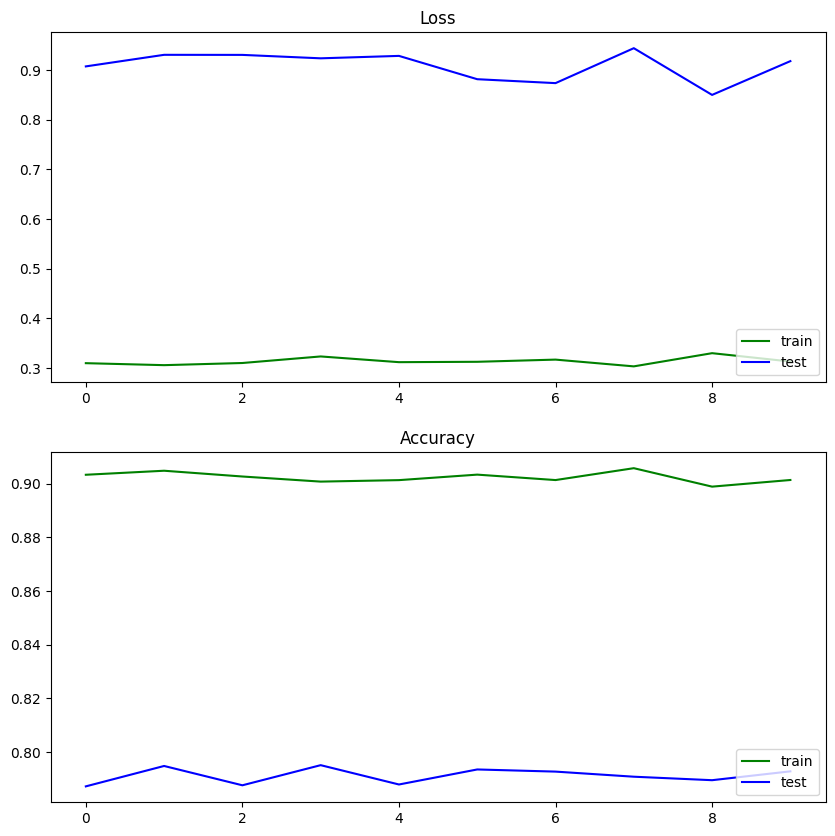

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))
plot_summary_train(history)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.8141 - accuracy: 0.8009
Test Accuracy: 0.8008999824523926
